In [1]:
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn
import matplotlib.pyplot as plt

## Convolutional Layer in Gluon

In [2]:
layer = nn.Conv2D(
        channels=1, #number of output channels in convolutional layer
        kernel_size=(3,3),
        in_channels=1, # input channel
        strides=(1,1),
        padding=(0,0),
        activation="relu",
        prefix="conv_"
)
layer

Conv2D(1 -> 1, kernel_size=(3, 3), stride=(1, 1), Activation(relu))

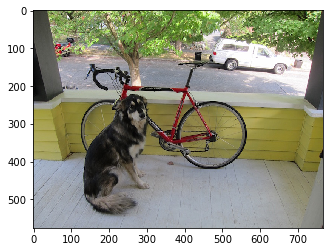

In [3]:
#Visualize image
o = plt.imshow(plt.imread("dog.jpg"))

In [4]:
#Initialize the parameters
layer.initialize(mx.init.Constant([
    #Sobel operators to detect vertical lines
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
]))

In [5]:
#sobel horizontal line detector is
Sobel_horizonatal = nd.array([[-1,-2,-1],
[0,0,0],
[1,1,1]
])

In [6]:
image = mx.image.imread("dog.jpg",0).astype('float32')

In [7]:
image_channel_first = image.transpose((2,0,1))

In [8]:
image_batchified = image_channel_first.expand_dims(axis=0)

In [9]:
output = layer(image_batchified)

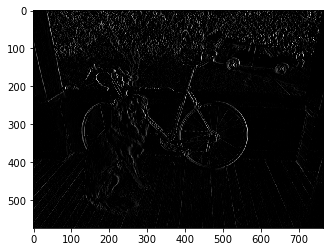

In [10]:
o = plt.imshow(output.squeeze().asnumpy(), cmap="gray")

In [11]:
#view the parameters for the model
layer.collect_params()

conv_ (
  Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter conv_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [12]:
layer.collect_params()['conv_weight']

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [13]:
layer.weight

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [14]:
layer.weight.data()


[[[[-1.  0.  1.]
   [-2.  0.  2.]
   [-1.  0.  1.]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [15]:
layer.bias.data()


[0.]
<NDArray 1 @cpu(0)>

## Max pooling

In [16]:
layer = nn.MaxPool2D(pool_size=(4,4))
layer

MaxPool2D(size=(4, 4), stride=(4, 4), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)

In [17]:
pooled = layer(output)

In [18]:
pooled


[[[[ 11.   3.   7. ... 295.  69.  51.]
   [  9.   3.   6. ...  14. 235. 367.]
   [  8.   6.   3. ...  17. 147. 246.]
   ...
   [ 46.  10.  35. ...   7.  10.   6.]
   [  4.  25.  29. ...   6.  15.   3.]
   [ 22.  35.  34. ...  12.   8.   8.]]]]
<NDArray 1x1x143x191 @cpu(0)>

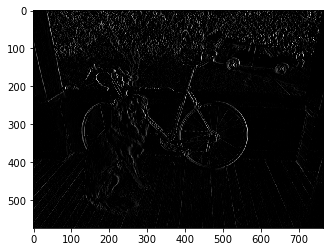

In [19]:
plt.imshow(output.squeeze().asnumpy(), cmap="gray")

In [20]:
layer.collect_params() # empty because pooling layer doesn't rely on any parameters

pool0_ (

)

## Dense Layer (Fully Connected Layer or Multi Layer Perceptron(MLP))

In [21]:
layer = nn.Dense(units=10, in_units=3, activation="relu")
layer

Dense(3 -> 10, Activation(relu))

In [22]:
layer.initialize(mx.init.One())

In [23]:
layer.weight.data(),layer.bias.data()

(
 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]
 <NDArray 10x3 @cpu(0)>,
 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 <NDArray 10 @cpu(0)>)

In [24]:
inputs = mx.nd.ones((1,3))
inputs, layer(inputs)

(
 [[1. 1. 1.]]
 <NDArray 1x3 @cpu(0)>,
 
 [[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]
 <NDArray 1x10 @cpu(0)>)

## Initializing Gluon Blocks

In [25]:
from mxnet import init, nd

### Initializing Weights 

By default, w = [-0.7, 0.7] and bias =0

* init.Uniform
* init.Normal
* init.Xavier
* init.Zero
* init.One
* init.Constant

### Xavier Initialization

Designed to keep the scale of gradients roughly the same in all layers.
The initializer fills the weights with random numbers in the range [-c, c]


where c = sqrt(magnitude/(0.5 * (nin + nout)))

for e.g. kernel_size = (3,3)

c = sqrt(3/(0.5 * (3 + 3)) = 0.57

so, weights are initialized using the numbers in between [-0.57, 0.57]

In [26]:
layer = nn.Conv2D(channels=1, in_channels=1, kernel_size=(3,3))
layer.initialize(init.Xavier())
layer.weight.data()


[[[[ 0.05636501  0.10720772  0.24847925]
   [ 0.39752382  0.11866093  0.41332   ]
   [ 0.05182666  0.4009717  -0.08815584]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [27]:
# Xavier Initialization for large number of output

layer = nn.Conv2D(channels=512, in_channels=512, kernel_size=(3,3))
layer.initialize(init.Xavier())
layer.weight.data()


[[[[ 6.30558282e-03  7.44512677e-03 -5.90012036e-03]
   [-3.18498909e-03 -1.03320191e-02  1.99925825e-02]
   [-2.26213969e-02  2.36611925e-02 -1.16015859e-02]]

  [[-5.94810024e-03 -1.13977119e-03  1.48870312e-02]
   [ 1.59302950e-02  1.47453696e-03 -1.02178566e-03]
   [ 3.47238407e-03 -5.47130220e-03  2.17186399e-02]]

  [[ 1.71504468e-02 -2.18904763e-02 -8.29784200e-03]
   [-2.10692212e-02  7.56136701e-03 -2.44837534e-02]
   [-6.72377087e-03  1.69739351e-02  2.33291015e-02]]

  ...

  [[-1.89376064e-02  1.28414705e-02 -9.75750573e-03]
   [-2.14299243e-02 -1.48998201e-03 -9.34058800e-04]
   [ 9.85651091e-03 -2.77236477e-03  7.10726157e-03]]

  [[ 8.80146027e-03 -1.04310457e-02 -2.61599012e-03]
   [-7.73893669e-03  1.04263239e-02 -1.88280437e-02]
   [ 9.26955044e-03  7.56127760e-04  1.00606941e-02]]

  [[ 5.49796224e-03  6.05231896e-03 -1.50172953e-02]
   [-1.78108159e-02  2.51362585e-02  1.33090205e-02]
   [-1.82600357e-02  1.43420584e-02  1.11638010e-02]]]


 [[[-3.26624699e-03 -1.6

## Deferred Initialization

No. of output is only defined and No. of Input is computed automatically

In [28]:
layer = nn.Conv2D(channels=1, kernel_size=(3,3))
layer.weight

Parameter conv2_weight (shape=(1, 0, 3, 3), dtype=<class 'numpy.float32'>)

In [29]:
layer.initialize(init.Xavier())
layer(mx.nd.ones((1,8,224,224)))
layer.weight

Parameter conv2_weight (shape=(1, 8, 3, 3), dtype=<class 'numpy.float32'>)

## Initialization Context

In [30]:
layer = nn.Conv2D(channels=1, kernel_size=(3,3))
layer.initialize(init.Xavier(), ctx=mx.cpu())

In [31]:
layer(nd.uniform(shape=(1,3,9,9)))
layer.weight.data()


[[[[-0.1271374  -0.03191733  0.03988528]
   [ 0.15088785  0.2573802   0.22344166]
   [-0.32773328  0.12020302  0.2458266 ]]

  [[-0.09329367 -0.37462515 -0.38246775]
   [ 0.2583567   0.3274216   0.2511248 ]
   [-0.4005935  -0.366601   -0.32464725]]

  [[ 0.10382628  0.23129243  0.00200292]
   [-0.35853    -0.26959127  0.31500143]
   [-0.2870974   0.32505625  0.22311515]]]]
<NDArray 1x3x3x3 @cpu(0)>

In [32]:
#Set parameter data
layer.weight.set_data(nd.ones((1,3,3,3), ctx=mx.cpu()))
layer.weight.data()


[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]]
<NDArray 1x3x3x3 @cpu(0)>

## Sequential Gluon Block

In [33]:
#purpose of sequential class is to provide convenience function to create sequential model
net = nn.Sequential()

In [34]:
net.add(
    nn.Conv2D(channels=6, kernel_size=(5,5), activation='tanh'),
    nn.MaxPool2D((2,2)),
    nn.Conv2D(channels=16, kernel_size=(5,5), activation='tanh'),
    nn.MaxPool2D((2,2)),
    nn.Dense(120, activation='tanh'),
    nn.Dense(84),
    nn.Dense(10)
)
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1), Activation(tanh))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(None -> 16, kernel_size=(5, 5), stride=(1, 1), Activation(tanh))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Dense(None -> 120, Activation(tanh))
  (5): Dense(None -> 84, linear)
  (6): Dense(None -> 10, linear)
)

In [35]:
net.initialize()

In [37]:
net(nd.ones((1,1,28,28)))


[[-0.00297068  0.00760758  0.00408191  0.01850619 -0.01368244  0.00483315
  -0.01684547  0.02524853  0.00250938  0.02221608]]
<NDArray 1x10 @cpu(0)>

In [38]:
# calling net on the input or calling forward are equivalent
# because sequential inherits from base Block
net.forward(nd.ones((1,1,28,28)))


[[-0.00297068  0.00760758  0.00408191  0.01850619 -0.01368244  0.00483315
  -0.01684547  0.02524853  0.00250938  0.02221608]]
<NDArray 1x10 @cpu(0)>

### Custom Gluon Block

Build complex data flow passing data from one block to another

In [41]:
class MLP(nn.Block):
    def __init__(self, hidden_units=256, **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.hidden = nn.Dense(hidden_units, activation='relu')
        self.output = nn.Dense(10) #output layer
        
    def forward(self, x):
        y = self.hidden(x)
        return self.output(y)

In [42]:
net = MLP(hidden_units=512)
net.initialize()
net(nd.random.uniform(shape=(1,64)))


[[ 0.15116523  0.19335972 -0.10748764  0.07916869 -0.01853022 -0.09680601
   0.10325873 -0.10383401 -0.17493582 -0.10580964]]
<NDArray 1x10 @cpu(0)>

#### Siamese Network

Architecture for comparing two images

In [58]:
class SiameseNetwork(nn.Block):
    # init method defines the layer and component
    def __init__(self, hidden_units=256, **kwargs):
        super(SiameseNetwork, self).__init__(**kwargs)
        self.mlp = nn.Sequential()
        with self.mlp.name_scope():
            self.mlp.add(
                nn.Dense(128, activation='relu'),
                nn.Dense(128, activation='relu'),
                nn.Dense(128, activation='relu')
            )
    # forward function defines forward computation: how the data flows through it        
    def forward(self, x1, x2):
            y1 = self.mlp(x1)
            y2 = self.mlp(x2)
            y1 = y1.expand_dims(axis=1) # Adding dimesion y1 = (N,1,C)
            y2 = y2.expand_dims(axis=2) # y2 = (N,C,1)
            return nd.batch_dot(y1, y2) # preserves batch dimension by performing dot product in 2nd and 3rd dimension

In [59]:
net = SiameseNetwork()
net.initialize()
x1 = nd.random.uniform(shape=(1,64))
x2 = nd.random.uniform(shape=(1,64))
net(x1,x2)


[[[0.0282147]]]
<NDArray 1x1x1 @cpu(0)>

## Visualization of Gluon block

In [60]:
import mxnet as mx
from mxnet import viz, nd
from mxnet.gluon import nn, model_zoo

In [61]:
#VGG = Visual Geometry Group
vgg11 = model_zoo.vision.vgg11(pretrained=True)
print(vgg11)
vgg11.summary(nd.ones((1,3,224,224)))

VGG(
  (features): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Activation(relu)
    (2): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (3): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Activation(relu)
    (5): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (6): Conv2D(128 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Activation(relu)
    (8): Conv2D(256 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Activation(relu)
    (10): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (11): Conv2D(256 -> 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): Activation(relu)
    (13): Conv2D(512 -> 512, kernel_size=(3, 3), stride=(1

In [71]:
#visualize
# viz.plot_network(vgg11(mx.sym.var('data')),
#                 shape={'data':(1,3,224,224)},
#                 node_attrs={'shape':'oval',
#                            'fixedsize':'false'}
#                 )

In [67]:
mobile_net = model_zoo.vision.mobilenet_v2_1_0(pretrained=True)
mobile_net

MobileNetV2(
  (features): HybridSequential(
    (0): Conv2D(3 -> 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
    (2): RELU6(
    
    )
    (3): LinearBottleneck(
      (out): HybridSequential(
        (0): Conv2D(32 -> 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
        (2): RELU6(
        
        )
        (3): Conv2D(1 -> 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
        (5): RELU6(
        
        )
        (6): Conv2D(32 -> 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=16)

In [68]:
mobile_net.summary(nd.ones((1,3,224,224)))

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                            (1, 3, 224, 224)               0
            Conv2D-1                           (1, 32, 112, 112)             864
         BatchNorm-2                           (1, 32, 112, 112)             128
             RELU6-3                           (1, 32, 112, 112)               0
            Conv2D-4                           (1, 32, 112, 112)            1024
         BatchNorm-5                           (1, 32, 112, 112)             128
             RELU6-6                           (1, 32, 112, 112)               0
            Conv2D-7                           (1, 32, 112, 112)             288
         BatchNorm-8                           (1, 32, 112, 112)             128
             RELU6-9                           (1, 32, 112, 112)               0
           Conv2D-10        

In [70]:
#export in XML
mobile_net.hybridize()
mobile_net(nd.ones((1,3,224,224)))
mobile_net.export('mobile_net')

In [ ]:
# view on https://lutzroeder.github.io/netron